In [ ]:
import os
import numpy as np

def add_tooltips(folder, required_count):
    tooltips = []
    
    # Iterate over the folder
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        if os.path.isfile(image_path):
            tooltips.append((filename, image_path))
    
    # 如果tooltips数量不足，进行补充
    while len(tooltips) < required_count:
        tooltips.extend(tooltips[:required_count - len(tooltips)])
    
    # 打印生成的tooltips数量
    print(f"Generated {len(tooltips)} tooltips from folder: {folder}")

    return tooltips[:required_count]

def check_and_print_tooltips(tooltips):
    for i, (filename, path) in enumerate(tooltips):
        if not os.path.isfile(path):
            print(f"Invalid file path at index {i}: {path}")
        else:
            print(f"Valid file path at index {i}: {path}")

# Load images from folder
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\cal'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\nor'

required_cal_count = 1976
required_nor_count = 1874

cal_tooltips = add_tooltips(cal_folder, required_cal_count)
nor_tooltips = add_tooltips(nor_folder, required_nor_count)

tooltips = cal_tooltips + nor_tooltips
tooltips = np.array(tooltips)

for i, (filename, path) in enumerate(tooltips):
    print(i,(tooltips[i][0], tooltips[i][1]))
        # if not os.path.isfile(path):
        #     print(f"Invalid file path at index {i}: {path}")
        # else:
        #     print(f"Valid file path at index {i}: {path}")

# # 检查并打印tooltips
# check_and_print_tooltips(tooltips[0][1])


In [2]:
import sys
sys.path.append(r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs") #存取所需函式的路徑


In [3]:
import load_save_pkl,os

if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl' # 替换为实际的保存路径
    # 如果日期文件夹不存在，则创建它
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    train_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\nor'
    test_nor_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\nor'
    train_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\train\cal'
    test_cal_path = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test\cal'

    load_save_pkl.generate_and_save_data(train_nor_path, train_cal_path, test_nor_path, test_cal_path, save_dir)
    


Train labels shape: (7025, 1)
Test labels shape: (2933, 1)
Loaded data and labels from pickle file.


下次只要load pkl，不用再generate_and_save_data

In [3]:
import load_save_pkl
import os

if __name__ == "__main__":
    save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\pkl'  # 替换为实际的保存路径
    file_name="data.pkl"
    date="2024-05-26"

    try:
        train_data, train_labels,test_data, test_labels = load_save_pkl.load_data_pickle(save_dir,file_name,date)
        print("Loaded data and labels from pickle file.")
    except FileNotFoundError as e:
        print(e)

#由於tSNE只需要test_data, test_labels，可以把train_data, train_labels 刪除


Loaded data and labels from pickle file.


In [ ]:
from cvt_to_png import cvt_to_png
src_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test'
png_folder=r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png'


cvt_to_png(src_folder,png_folder)

In [25]:
import importlib

# 添加函式檔案的路徑
sys.path.append(r"D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\reqiured_funcs")

# 假設你的函式在 my_functions.py 中
import tSNE

# 確保加載最新版本
importlib.reload(tSNE)

<module 'tSNE' from 'D:\\OCT\\dental OCT\\bare tooth\\ensemble_model_aug\\code\\reqiured_funcs\\tSNE.py'>

In [4]:
import keras
from keras.models import load_model

# 指定模型檔案路徑:記得從日期那邊微調路徑!
model_path = r"D:/OCT/dental OCT/bare tooth/ensemble_model_aug/best_results/2024-05-25/ensemble_ResNet50_0.5_&VGG16_0.5_SGD_acc=0.7403.h5"
# 載入模型
ensemble_model = load_model(model_path)

In [4]:
#%% 
from keras import backend as K
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in ensemble_model.layers])
    layer = layer_dict[layer_name]
    return layer

print([(layer.name, layer) for layer in ensemble_model.layers])

[('input_4', <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001DC220C1160>), ('conv1_pad', <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001DC2214C190>), ('conv1_conv', <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DC2214C130>), ('conv1_bn', <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001DC2214CFD0>), ('conv1_relu', <tensorflow.python.keras.layers.core.Activation object at 0x000001DC221B76D0>), ('pool1_pad', <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001DC221B7820>), ('pool1_pool', <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001DC221B76A0>), ('conv2_block1_1_conv', <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001DC221B7BE0>), ('conv2_block1_1_bn', <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001DC221B7F70>), ('conv2_block1_1_relu', <tensorflow.python.keras.

61/61 [==============================] - 16s 255ms/step
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3850 samples in 0.002s...
[t-SNE] Computed neighbors for 3850 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3850
[t-SNE] Computed conditional probabilities for sample 2000 / 3850
[t-SNE] Computed conditional probabilities for sample 3000 / 3850
[t-SNE] Computed conditional probabilities for sample 3850 / 3850
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.745819
[t-SNE] KL divergence after 1000 iterations: 0.654465
Generated 1976 tooltips from folder: D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\cal
Generated 1874 tooltips from folder: D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\nor


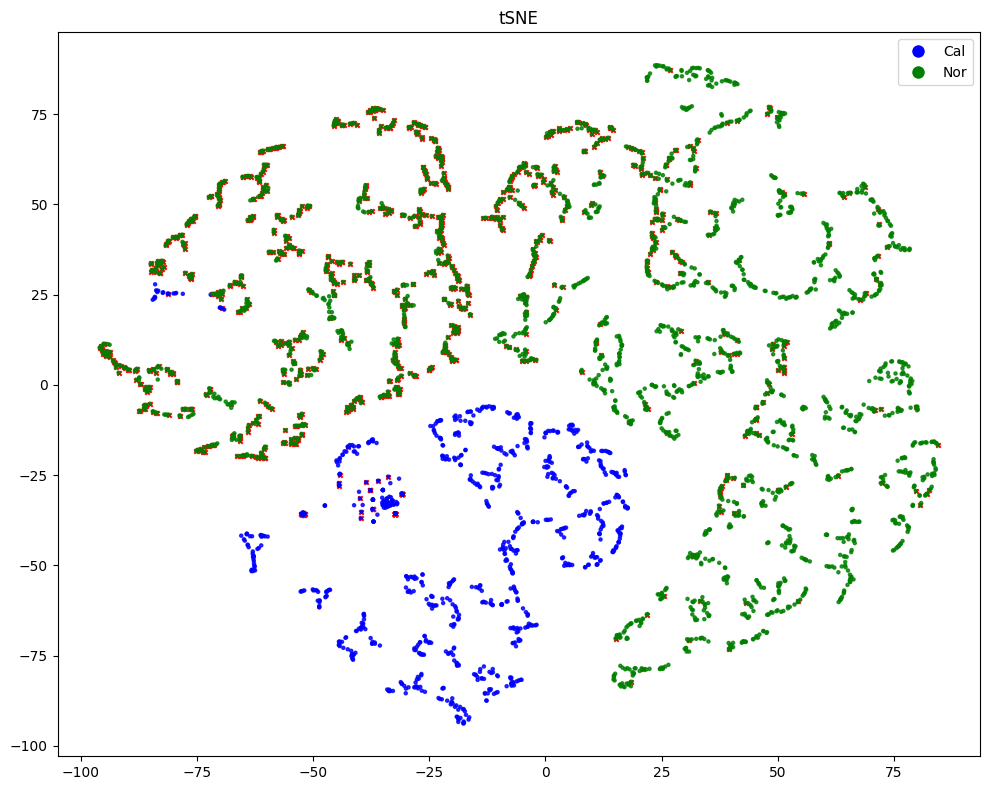

In [26]:
#from tSNE import plot_and_save_tSNE #會有緩存問題，必須reload修訂版函式

import tSNE

# Load images from folder
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\cal'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\nor'

#save tSNE img
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\tSNE'

#2nd 參數請比照get_output_layer的最後一個layer.name
#目前最好result
tSNE.plot_tSNE_best(ensemble_model,'dense_5',[test_data,test_data],test_labels,save_dir,cal_folder,nor_folder, label_name=['Nor', 'Cal'])

#tSNE.plot_tSNE_opt(ensemble_model,'dense_5',[test_data,test_data],test_labels,save_dir,cal_folder,nor_folder,label_name= ['Nor', 'Cal'])
#添加資訊，此Nor/Cal 樣本來自於nor1~nor7/supra1~supra5的哪筆data

之後試添加到plot_tSNE_opt

In [ ]:
# from matplotlib.lines import Line2D

# # 創建兩個空的列表，用於存儲 'cal' 和 'nor' 類別的資料點
# cal_points = []
# nor_points = []

# # 在遍歷資料點時，根據類別將資料點添加到相應的列表中
# for label, group in groups:
#     group_indices = group.index.tolist()
#     predicted_labels_group = np.array([layer_output_label_predict[i] for i in group_indices])

#     for j, i in enumerate(group_indices):
#         if i >= len(tooltips) or i < 0:
#             continue

#         try:
#             filename = tooltips[i][0]           
#             tooltip = tooltips[i][1] #對應圖檔路徑
#         except (KeyError, IndexError):
#             print(f"Invalid index at position {i}, skipping.")
#             continue

#         true_label_info = extract_info_from_filename(filename)
#         color = 'b' if predicted_labels_group[j] == 'cal' else 'g'

#         if predicted_labels_group[j] == 'cal':
#             cal_points.append((group.x.iloc[j], group.y.iloc[j]))
#         else:
#             nor_points.append((group.x.iloc[j], group.y.iloc[j]))

# # 在圖上添加 'cal' 和 'nor' 類別的點
# cal_scatter = ax.scatter(*zip(*cal_points), color='b', marker='o', alpha=0.8, s=30, label='Cal')
# nor_scatter = ax.scatter(*zip(*nor_points), color='g', marker='o', alpha=0.8, s=30, label='Nor')

# # 創建圖例中的點，一個 'cal' 類別點，一個 'nor' 類別點
# legend_handles = [Line2D([0], [0], marker='o', color='b', label='Cal'),
#                   Line2D([0], [0], marker='o', color='g', label='Nor')]

# # 添加圖例
# ax.legend(handles=legend_handles, loc='best')

# # 顯示圖形
# plt.show()


下面code不動!!! 備用

46/46 [==============================] - 12s 260ms/step
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2933 samples in 0.001s...
[t-SNE] Computed neighbors for 2933 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2933
[t-SNE] Computed conditional probabilities for sample 2000 / 2933
[t-SNE] Computed conditional probabilities for sample 2933 / 2933
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.120155
[t-SNE] KL divergence after 1000 iterations: 0.601657


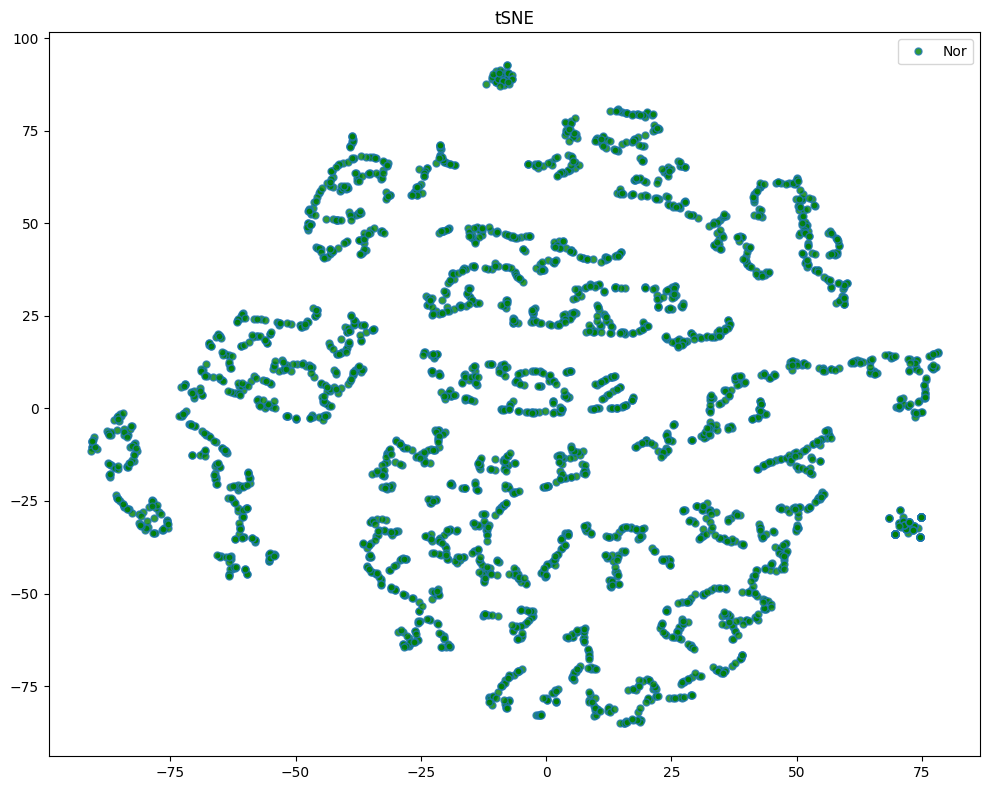

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
from sklearn.manifold import TSNE
from keras.models import Model
from datetime import datetime
from IPython.display import Image
import re

# Load images from folder
cal_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\cal'
nor_folder = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\code\2024_dentalCalculus\test_png\nor'

#save tSNE img
save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\tSNE'

#函式參數的輸入
#model:ensemble_model layer_name 'dense_2' test_data=[test_data, test_data]

def add_tooltips(folder):
    tooltips = []
# Iterate over cal_folder
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        if os.path.isfile(image_path):
            tooltips.append((filename,f'<img src="{image_path}" width="402" height="292">'))
    #print("Length of tooltips:", len(tooltips))

    return tooltips


def extract_info_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 0:
        part0 = parts[0]
    else:
        part0 = filename

    match = re.search(r'(supra\d+|NOR\d+)', filename) #\d+:後面接至少1個數字
    if match:
        return f"{part0} {match.group(1)}"
    return filename


batch_size = 64
#.get_layer()中的layer_name可能需要調變
intermediate_layer_model = Model(inputs=ensemble_model.input, outputs=ensemble_model.get_layer('dense_2').output)
intermediate_output = intermediate_layer_model.predict([test_data,test_data], batch_size=batch_size, verbose=1)

Y = TSNE(n_components=2, init='random', random_state=0, perplexity=10, verbose=1).fit_transform(
    intermediate_output.reshape(intermediate_output.shape[0], -1))  

# layer_output_label = np.argmax(test_labels, axis=1)
# df = pd.DataFrame(dict(x=Y[:, 0], y=Y[:, 1], label=layer_output_label))

groups = df.groupby('label') #資料點來源

cal_tooltips = add_tooltips(cal_folder)
nor_tooltips = add_tooltips(nor_folder)
tooltips = cal_tooltips + nor_tooltips

# Convert to numpy array for easier indexing
tooltips = np.array(tooltips)

tooltips_dict = {filename: tooltip for filename, tooltip in tooltips}

if len(tooltips) < intermediate_output.shape[0]:
    raise ValueError("The number of tooltips is less than the number of data points. Ensure that the tooltips cover all data points.")

# # Calculate predictions
# prediction = ensemble_model.predict([test_data,test_data])
# layer_output_label_predict = np.argmax(prediction, axis=1)
# layer_output_label_predict = ['nor' if label == 0 else 'cal' for label in layer_output_label_predict] # 把 label從0 1分別轉為nor cal

# 假设 test_labels 是 one-hot 编码的标签
# 如果 test_labels 已经是类别标签向量，就不需要 np.argmax
if test_labels.ndim > 1:
    layer_output_label = np.argmax(test_labels, axis=1)
else:
    layer_output_label = test_labels
    
layer_output_label_predict = ['nor' if label == 0 else 'cal' for label in layer_output_label_predict] # 把 label從0 1分別轉為nor cal

df = pd.DataFrame(dict(x=Y[:, 0], y=Y[:, 1], label=layer_output_label_predict))

# 按标签分组
groups = df.groupby('label') #資料點來源

# Generate plot
fig, ax = plt.subplots(figsize=(10,8)) # 因為圖有點大，導致資訊埋在下方->長寬減半
ax.margins(0.05)

#使用一個標誌變數來確保每個標籤只被添加一次:上面的結果被下面覆蓋了
plotted_labels = {"Nor": False, "Cal": False}
    
for label, group in groups:
    group_indices = group.index.tolist()
    
    true_labels_group = np.array(['cal' if cal_folder in tooltip else 'nor' for tooltip in tooltips[group_indices]])
    predicted_labels_group = np.array([layer_output_label_predict[i] for i in group_indices])

    color = 'b' if label == 1 else 'g'
    label_name = 'Cal' if label == 1 else 'Nor'

    #有些值不在plotted_labels->設為False
    if label_name not in plotted_labels:
        plotted_labels[label_name] = False

    if not plotted_labels[label_name]:
        points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=label_name, alpha=0.8, markerfacecolor=color)
        plotted_labels[label_name] = True
    else:
        points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, alpha=0.8, markerfacecolor=color)
    
    # 标记预测错误的点为红色框:用scatter->error
    # for j, i in enumerate(group_indices):
    #     if true_labels_group[j] != predicted_labels_group[j]:  # 预测错误的点
    #         filename = tooltips[i][0]
    #         ax.scatter(group.x[j], group.y[j], marker='s', edgecolor='red', facecolor='none', s=100)  # 红色框


    combined_labels = []

    for j, i in enumerate(group_indices):
        filename = tooltips[i][0]
        tooltip = tooltips[i][1]
        true_label_info = extract_info_from_filename(filename)
        combined_labels.append(f'{tooltip}<br>True Label: {true_label_info}<br>Predicted Label: {predicted_labels_group[j]}')

    plugins.connect(fig, plugins.PointHTMLTooltip(points[0], labels=combined_labels, voffset=10, hoffset=10))

ax.legend()   
plt.title('tSNE')
plt.tight_layout()
plt.show()

# Convert to HTML
html_str = mpld3.fig_to_html(fig)

# 添加 CSS 样式，使图像居中显示
html_str_with_style = f'<div style="display: flex; justify-content: center;"><div>{html_str}</div></div>'

# Save HTML file
# save_dir = r'D:\OCT\dental OCT\bare tooth\ensemble_model_aug\tSNE'
today_date = datetime.now().strftime("%Y-%m-%d")
save_dir = os.path.join(save_dir, today_date)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

save_path = os.path.join(save_dir, 'tSNE.html')
with open(save_path, 'w') as file:
    file.write(html_str_with_style)
